In [2]:
from transformers import CLIPProcessor, CLIPModel
from train_clip import car_labels,car_prompts
import cv2
import matplotlib.pyplot as plt
import torch

ModuleNotFoundError: No module named 'transformers'

In [17]:
IMAGE_DIR = "example_images/dodge charger sedan 2012.png"

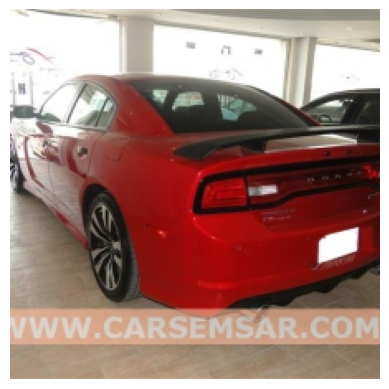

In [18]:
# Preprocessing the image
image = cv2.imread(IMAGE_DIR)
h, w, _ = image.shape
crop_size = min(h, w)
start_x = (w - crop_size) // 2
start_y = (h - crop_size) // 2
image = image[start_y: start_y + crop_size, start_x: start_x + crop_size]
image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis("off")  # Hide axis
plt.show()

In [19]:
model = CLIPModel.from_pretrained("models/finetuned_clip_model")
processor = CLIPProcessor.from_pretrained("models/finetuned_clip_model")

In [20]:
inputs = processor(text=car_prompts, images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)

In [21]:
top_k = 5
top_probs, top_indices = torch.topk(probs, top_k, dim=1)

# Print the top 5 classes with their probabilities
print("Top 5 categories with the highest probability:")
for i in range(top_k):
    class_idx = top_indices[0, i].item()  # Get the class index
    class_prob = top_probs[0, i].item()   # Get the probability
    class_name = car_prompts[class_idx]   # Map index to class name

    print(f"Class: {class_name}, Probability: {class_prob*100:.2f}%")

Top 5 categories with the highest probability:
Class: A photo of dodge charger sedan 2012, Probability: 99.39%
Class: A photo of dodge durango suv 2012, Probability: 0.16%
Class: A photo of dodge charger srt-8 2009, Probability: 0.09%
Class: A photo of dodge challenger srt8 2011, Probability: 0.07%
Class: A photo of dodge ram pickup 3500 crew cab 2010, Probability: 0.06%
